In [117]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
from ipywidgets import interact
from math import sqrt
from pydataset import data

## Mini Exercise - CLT

Calculate, theoretically (in your head is fine), the expected value for the average of 6 dice rolls.
Write the code necessary to simulate taking the average of 6 dice rolls 10,000 times. Store each of the 10,000 averages in a list.

Plot the distribution of the calculated averages. What do you notice? What kind of distribution is the underlying random variable (i.e. one dice roll?)

In [8]:
rolls = pd.DataFrame(np.random.choice([1, 2, 3, 4, 5, 6], size=(10_000, 6)))

In [9]:
rolls

,0,1,2,3,4,5
0,6,6,3,1,4,5
1,3,3,1,3,6,2
2,3,3,5,1,2,4
3,2,5,6,6,5,2
4,2,3,6,4,2,1
...,...,...,...,...,...,...
9995,6,6,3,3,4,6
9996,1,2,1,5,6,1
9997,4,1,3,4,3,1
9998,6,5,1,5,2,5


In [10]:
rolls['avg'] = rolls.mean(axis = 1)

In [11]:
rolls

,0,1,2,3,4,5,avg
0,6,6,3,1,4,5,4.166667
1,3,3,1,3,6,2,3.000000
2,3,3,5,1,2,4,3.000000
3,2,5,6,6,5,2,4.333333
4,2,3,6,4,2,1,3.000000
...,...,...,...,...,...,...,...
9995,6,6,3,3,4,6,4.666667
9996,1,2,1,5,6,1,2.666667
9997,4,1,3,4,3,1,2.666667
9998,6,5,1,5,2,5,4.000000


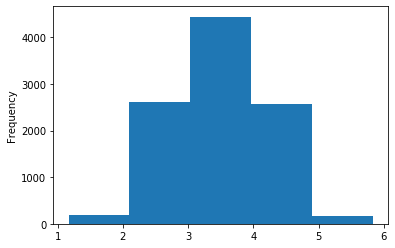

In [19]:
rolls.avg.plot.hist(bins=5)

In [13]:
rolls.mean()

0      3.48210
1      3.49620
2      3.51230
3      3.48440
4      3.49080
5      3.48530
avg    3.49185
dtype: float64

In [21]:
def plot_dice_rolls(n_dice):
    n_sims = 10_000
    rolls = np.random.choice(range(1, 7), (n_sims, n_dice))

    plt.figure(figsize=(10, 7))
    plt.hist(rolls.mean(axis=1), density=True) # density=True gives us a %
    plt.title(f'Average of {n_dice} dice rolls based on {n_sims:,} simulations')
    plt.xlim(0, 7)
    plt.ylabel('% of times we get this value')
    plt.xlabel('Average')

    plt.show()

interact(plot_dice_rolls, n_dice=(1, 50, 2))

interactive(children=(IntSlider(value=25, description='n_dice', max=50, min=1, step=2), Output()), _dom_classe…

<function __main__.plot_dice_rolls(n_dice)>

2 x 2 Categories:

- True / False : Whether we concluded the right or wrong thing
- Positive / Negative: Whether we concluded there is something(+) or there isn't something (-)

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

## Has the network latency gone up since we switched internet service providers?


Data Sources:

- user survey on latency experience
- pre-changes speed tests vs post-change speed tests
    - Speedtest.net
    - Fast.com

speed test changes

- $H_0$: network latency has remained the same since switching to a new ISP
- $H_a$: network latency has improved since the switch to the new ISP


- True Positive
    - low p-value
    - reject $H_0$
    - new avg latency via two different speedtest platforms is 50ms
    - previous avg latency via two different speedtest platforms was 102ms


- False Positive
    - low p-value
    - reject $H_0$
    - a significant difference in latency 
    - latency speeds were calculated during peak hours for old ISP and non-peak hours for new ISP
    
- True Negative
    - high p-value
    - fail to reject $H_0$
    - new avg latency is 90ms
    - previous avg was 100ms
    
- False Negative
    - high p-value
    - fail to reject $H_0$
    - network latency has remained the same
    - bias survey of my nephew still getting pwn'd by noobs in COD

## Is the website redesign any good?

Data Sources:

- user survey on website redesign
- conversion rate changes from old vs new design
- scrape social network sentiment reaction to redesign

conversion rate changes

- $H_0$: conversion rates have remained steady since the website redesign took place
- $H_a$: conversion rates have increased since the website redesign


- True Positive
    - low p-value
    - reject $H_0$
    - conversion rates after redesign are 5.1
    - Conversion rate prior to redesign were 2.2
    

- False Positive
    - low p-value
    - reject $H_0$
    - a significant difference in conversion rates
    - conversion rates data used was pre holiday sales, post was during holiday seasson
    
    
- True Negative
    - high p-value
    - fail to reject $H_0$
    - new avg latency is 3.4
    - previous avg was 3.1
    
    
- False Negative
    - high p-value
    - fail to reject $H_0$
    - conversion rates remained stable
    - landing page for conversion remained the same and wasn't part of the redesign

## Is our television ad driving more sales?

Data Sources:

- user questionaire for how customer came through the door
- special promo code per ad to gauge user engagement with tv ad

promo code per ad

- $H_0$: sales have remained steady regardless of television ad
- $H_a$: televison ad has driven more sales 


- True Positive
    - low p-value
    - reject $H_0$
    - month-over-month sales have increased: 15%
    - previous month-over-month sales rate: 1.9%


- False Positive
    - low p-value
    - reject $H_0$
    - a significant difference sales 
    - everyone was quaratined and you sell toilet paper
    
    
- True Negative
    - high p-value
    - fail to reject $H_0$
    - month-over-month sales rate: 3.1%
    - previous month-over-month sales rate: 2.4%
    
    
- False Negative
    - high p-value
    - fail to reject $H_0$
    - sales figures remained flat
    - your target audience doesn't watch TV during your TV ad slotted time

In [31]:
df = pd.read_csv('exam_scores.csv')
df.head()

,exam_score,hours_studied,study_strategy,handedness,coffee_consumed,hours_slept
0,100.591011,9.126291,flashcards,left,0,11
1,95.637086,9.677438,flashcards,left,1,10
2,53.200296,4.550207,NaN,right,5,6
3,63.934268,6.487848,flashcards,right,4,7
4,51.186370,6.720959,flashcards,right,5,6


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
exam_score         40 non-null float64
hours_studied      40 non-null float64
study_strategy     20 non-null object
handedness         40 non-null object
coffee_consumed    40 non-null int64
hours_slept        40 non-null int64
dtypes: float64(2), int64(2), object(2)
memory usage: 2.0+ KB


In [33]:
# Becuase of the 20 nulls in the strategy col
df.study_strategy.fillna('Winged_It', inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
exam_score         40 non-null float64
hours_studied      40 non-null float64
study_strategy     40 non-null object
handedness         40 non-null object
coffee_consumed    40 non-null int64
hours_slept        40 non-null int64
dtypes: float64(2), int64(2), object(2)
memory usage: 2.0+ KB


In [35]:
df.head()

,exam_score,hours_studied,study_strategy,handedness,coffee_consumed,hours_slept
0,100.591011,9.126291,flashcards,left,0,11
1,95.637086,9.677438,flashcards,left,1,10
2,53.200296,4.550207,Winged_It,right,5,6
3,63.934268,6.487848,flashcards,right,4,7
4,51.186370,6.720959,flashcards,right,5,6


Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

 - $H_0$: There is no difference in the average of time it takes to sell homes between the two offices in Ace Realty
 - $H_a$: There is a difference in the average of time it takes to sell homes between the two offices

In [113]:
xbar1 = 90
xbar2 = 100

n1 = 40
n2 = 50

s1 = 15
s2 = 20

degf = (n1 + n2) - 2

s_p = sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 -2))

t = (xbar1 - xbar2) / (s_p * sqrt(1 / n1 + 1 / n2))

p = stats.t(degf).cdf(t) * 2

t, p

(-2.6252287036468456, 0.01020985244923939)

In [100]:
# alpha = 0.05

print(f'''
Because p ({p:.6f}) > alpha ({alpha}), we fail to reject the null hypothesis, meaning that there is no significant difference in average time to sell a home between the two branches''')


Because p (1.989790) > alpha (0.05), we fail to reject the null hypothesis, meaning that there is no significant difference in average time to sell a home between the two branches


Load the mpg dataset and use it to answer the following questions:

In [41]:
mpg = data('mpg')

In [42]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

- $H_0$: There is no difference in fuel efficiency between cars from 2008 vs 1999
- $H_a$: Cars from 2008 have a better fuel efficienct than cars from 1999

In [44]:
mpg['fuel_eff'] = (mpg.cty + mpg.hwy) / 2

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_eff
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [56]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 12 columns):
manufacturer    234 non-null object
model           234 non-null object
displ           234 non-null float64
year            234 non-null int64
cyl             234 non-null int64
trans           234 non-null object
drv             234 non-null object
cty             234 non-null int64
hwy             234 non-null int64
fl              234 non-null object
class           234 non-null object
fuel_eff        234 non-null float64
dtypes: float64(2), int64(4), object(6)
memory usage: 23.8+ KB


In [115]:
x1 = mpg[mpg.year == 1999].fuel_eff
x2 = mpg[mpg.year == 2008].fuel_eff

stats.ttest_ind(x1, x2)

Ttest_indResult(statistic=0.21960177245940962, pvalue=0.8263744040323578)

Because the p value (0.826) > alpha (0.05), we fail to reject the null hypothesis.

This means that there is no significant difference between cars from 1999 and 2008

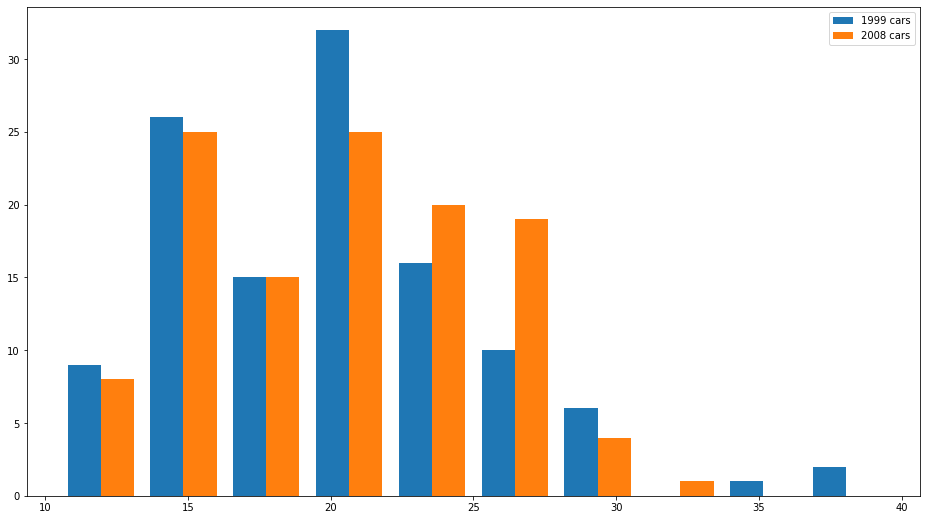

In [122]:
plt.figure(figsize=(16,9))
plt.hist([x1, x2], label=["1999 cars", "2008 cars"])
plt.legend(loc="upper right")

### Are compact cars more fuel-efficient than the average car?

- $H_0$: There is no significant difference in fuel-efficiency between compact cars and the average car
- $H_a$: Compact cars are on average more fuel- efficient than the average car

In [65]:
mpg = mpg.rename(columns = {'class':'car_class'})

In [66]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,car_class,fuel_eff
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [104]:
x1 = mpg[mpg.car_class == 'compact'].fuel_eff
x2 = mpg.fuel_eff

stats.ttest_ind(x1, x2)

Ttest_indResult(statistic=5.260311926248542, pvalue=2.8684546158129373e-07)

In [109]:
x = mpg[mpg["car_class"] == "compact"].fuel_eff
mu = mpg.fuel_eff.mean()

t_stat, p = stats.ttest_1samp(x, mu)

print(f't = {t_stat:.3}')
print(f'p = {p:.4}')

t = 7.9
p = 4.199e-10


The p-value is below the alpha, which means we reject the null hypothesis that compact cars, on average, have the same fuel-efficiency as the average car.

### Do manual cars get better gas mileage than automatic cars?


- $H_0$: There is no difference in gas mileage between manual and automatic cars
- $H_a$: There is a difference in gas mileage between manual and automatic cars

In [126]:
x1 = mpg[mpg.trans.str.startswith('manual')].hwy
x2 = mpg[mpg.trans.str.contains('auto')].hwy

t, p = stats.ttest_ind(x1, x2)
t, p

(4.368349972819688, 1.888044765552951e-05)

In [112]:
print(f"avg fuel effienct for automatic cars: {x1.mean():.3}, and manual: {x2.mean():.3}")

avg fuel effienct for automatic cars: 22.2, and manual: 19.1


Because the p-value is smaller than that alpha, we can reject the null hypothesis that there is no difference between transmission and fuel efficiency.

For this particular case, it seems that manual cars are significantly different, on average, than automatic cars when it comes to fuel efficiency.


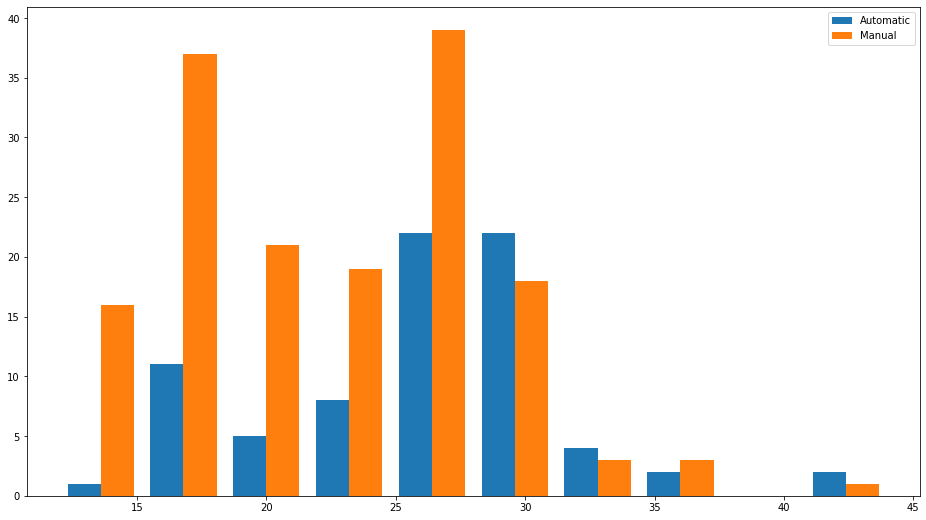

In [131]:
plt.figure(figsize=(16,9))
plt.hist([x1, x2], label=["Automatic", "Manual"])
plt.legend(loc="upper right")
plt.show()

In [ ]:
mpg['transmission_type'] = 

## Bonus : What is the p-value for small, medium and heavy coffee drinking against exam scores

In [88]:
df = pd.read_csv('exam_scores.csv')
df.describe()

,exam_score,hours_studied,coffee_consumed,hours_slept
count,40.000000,40.000000,40.000000,40.000000
mean,55.283366,5.417466,4.900000,6.100000
std,29.053156,2.763843,2.871612,2.871612
min,0.000000,-1.828194,0.000000,1.000000
25%,35.229961,3.912954,3.000000,4.000000
50%,58.356584,5.830652,5.000000,6.000000
75%,72.618725,7.838777,7.000000,8.000000
max,103.623596,10.040814,10.000000,11.000000
